In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from helperClasses.tennis_ball_detection_pytorch import BallDetectionPytorch
import cProfile
import snakeviz as sv
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
svo_path = '../../data/HD1080_SN35520970_11-03-24.svo'
ballDetection = BallDetectionPytorch(svo_path)

In [3]:
ballDetection.calculate_background(svo_path, 100, 30)
ballDetection.save_background()

100%|██████████| 3000/3000 [00:55<00:00, 54.37it/s]


In [3]:
ballDetection.load_background()

tensor([[[ 73.,  99., 122.],
         [ 73.,  99., 122.],
         [ 73., 100., 122.],
         ...,
         [146., 156., 157.],
         [145., 156., 156.],
         [145., 157., 157.]],

        [[ 72.,  99., 123.],
         [ 72.,  99., 122.],
         [ 70.,  98., 122.],
         ...,
         [145., 155., 155.],
         [145., 155., 156.],
         [144., 156., 156.]],

        [[ 72., 100., 123.],
         [ 72.,  99., 122.],
         [ 71.,  98., 121.],
         ...,
         [143., 154., 155.],
         [143., 154., 155.],
         [143., 154., 155.]],

        ...,

        [[125., 128., 103.],
         [124., 128., 103.],
         [124., 127., 102.],
         ...,
         [156., 153., 132.],
         [156., 152., 132.],
         [156., 152., 132.]],

        [[124., 127., 102.],
         [123., 127., 102.],
         [123., 126., 101.],
         ...,
         [157., 153., 133.],
         [156., 153., 132.],
         [156., 153., 132.]],

        [[122., 126., 101.],
       

In [4]:
result = ballDetection.get_ball_by_frame(500, 1500, False)

100%|██████████| 1000/1000 [00:52<00:00, 19.17it/s]


shape of result_list: torch.Size([2000])


In [5]:
#Tensor to numpy
numpyresult = result.cpu().numpy()
numpyresult

array([[ 569, 1270],
       [ 650, 1892],
       [ 655, 1642],
       ...,
       [ 576,  327],
       [ 533,  947],
       [ 561, 1238]], dtype=int64)

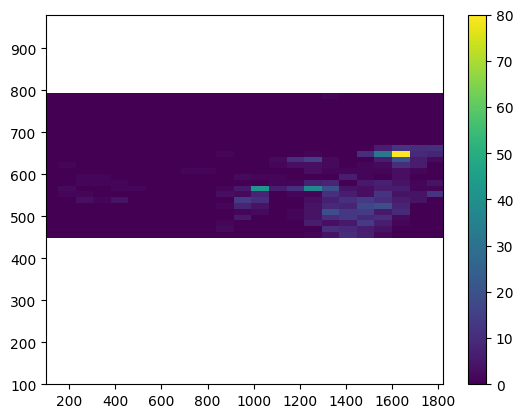

In [10]:
plt.hist2d(numpyresult[:,1], numpyresult[:,0], bins=25)
plt.xlim(100, 1820)
plt.ylim(100, 980)
plt.colorbar()
plt.show()

## Profiling

In [2]:
%load_ext snakeviz

In [0]:
svo_path = '../../data/HD1080_SN35520970_11-03-24.svo'
ballDetection = BallDetectionPytorch(svo_path)

ballDetection.get_background(svo_path, 10, 30)

%snakeviz ballDetection.get_ball_by_frame(500, 1100, True)

## Versuch Ballerkennung Links